In [2]:
inputs = [1,2,3,2.5]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]

biases = [2,3,.5]
inputs, weights, biases


([1, 2, 3, 2.5],
 [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]],
 [2, 3, 0.5])

In [3]:
l=zip(weights, biases)
l

In [4]:
a = [1,2,3]
b = [2,3,4]
dotp = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
dotp

20

### A single neuron with NumPy

In [5]:
import numpy as np

inputs = [1.0 , 2.0 ,3.0 ,2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

np.dot(weights, inputs)+ bias

4.8

### A layer of neurons with NumPy

In [6]:
inputs = [1,2,3,2.5]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]

biases = [2,3,.5]

layer_outputs = np.dot(weights, inputs) + biases
layer_outputs

array([4.8  , 1.21 , 2.385])

### A Batch of Data

In [7]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]
inputs

[[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]]

### Matrix Product and transposition

In [8]:
a = np.array([[1,2,3]])
b = [2,3,4]
b = np.array([b]).T
np.dot(a,b)

array([[20]])

### A Layer of Neurons & Batch of Data with NumPy

In [9]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]
inputs = np.array(inputs)
weights = np.array(weights)

In [10]:
np.dot(inputs, weights.T)

array([[ 2.8  , -1.79 ,  1.885],
       [ 6.9  , -4.81 , -0.3  ],
       [-0.59 , -1.949, -0.474]])

In [11]:
biases = np.array([2,3,.5])
np.dot(inputs, weights.T) + biases

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

## Chapter 3. Adding Layers

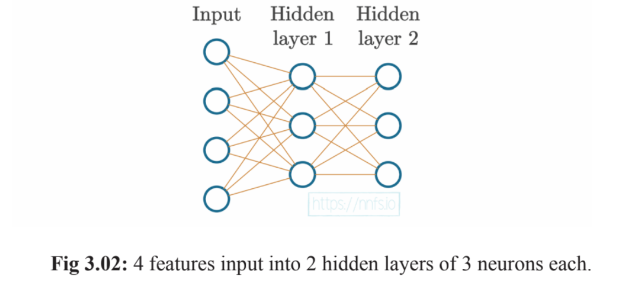

In [14]:
from IPython.display import Image
Image(filename=r".\img\Fig 3.02 2 layers x 3 neurons.png")

In [15]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]   # 3 input samples, with 4 inputs each

# Layer 1
weights = [
    [.2, .8, -.5, 1],           # Neuron 1, with 4 inputs
    [.5, -.91, .26, -.5],       # Neuron 2, with 4 inputs
    [-.26, -.27, .17, .87]]     # Neuron 3, with 4 inputs
biases = [2,3,.5]

In [16]:
# Layer 2
weights2 = [
    [.1, -.14, .5],
    [-.5, .12, -.33],
    [-.44, .73, -.13]]
biases2 = [-1, 2, -0.5]

In [17]:
layer1_outputs = np.dot(inputs, np.array(weights).T)+biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Import dataset from NNFS

In [19]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

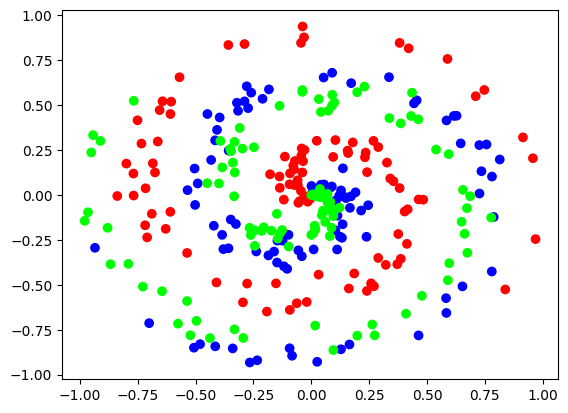

In [20]:
import matplotlib.pyplot as plt

X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [26]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # initializing weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases  = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [27]:
0.01*np.random.randn(4,3)

array([[-0.01550429,  0.00417319, -0.00944368],
       [ 0.00238103, -0.01405963, -0.00590058],
       [-0.00110489, -0.016607  ,  0.00115148],
       [-0.00379148, -0.01742356, -0.01303243]], dtype=float32)

In [ ]:
np.zeros((1,4))

array([[0., 0., 0., 0.]], dtype=float32)

In [ ]:
dense1 = Layer_Dense(2,3)
dense1.forward(X)

In [ ]:
dense1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-6.9618800e-05, -1.2933930e-04, -2.5668978e-06],
       [-7.2672674e-06, -1.2596391e-04, -1.1681977e-04],
       [ 4.0117364e-05, -1.2153350e-04, -2.0171423e-04],
       [-2.2406109e-04, -4.7712232e-04, -7.1330891e-05]], dtype=float32)

## Chapter 4: Activation Functions

ReLU Activation Function Code

In [23]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]

output = np.maximum(0, inputs)

print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [29]:
# ReLU Activation
class Activation_ReLU: 
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [30]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previos layer
activation1.forward(dense1.output)

activation1.output[:10]


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.7795961e-04, 0.0000000e+00],
       [3.0106357e-05, 3.6696982e-04, 0.0000000e+00],
       [0.0000000e+00, 1.9415646e-04, 0.0000000e+00],
       [0.0000000e+00, 1.6941362e-04, 1.2681631e-05],
       [0.0000000e+00, 5.9150584e-04, 0.0000000e+00],
       [0.0000000e+00, 6.9160474e-04, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.5420744e-04],
       [0.0000000e+00, 8.7310793e-04, 0.0000000e+00],
       [0.0000000e+00, 8.2801777e-04, 0.0000000e+00]], dtype=float32)

## The Softmax activation function